In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
df = pd.read_csv('/content/hypertension_dataset.csv')

In [9]:
df.head()

,Country,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,...,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education_Level,Employment_Status,Hypertension
0,UK,58,29.5,230,160,79,Never,27.9,Low,Yes,...,6.1,80,100,75,72,179,Female,Primary,Unemployed,High
1,Spain,34,36.2,201,120,84,Never,27.5,High,Yes,...,9.8,56,77,47,90,113,Male,Secondary,Unemployed,High
2,Indonesia,73,18.2,173,156,60,Current,1.8,High,Yes,...,5.2,75,162,56,81,101,Male,Primary,Employed,Low
3,Canada,60,20.3,183,122,94,Never,11.6,Moderate,Yes,...,7.5,71,164,93,94,199,Female,Secondary,Retired,High
4,France,73,21.8,296,91,97,Never,29.1,Moderate,Yes,...,5.0,52,108,74,226,157,Female,Primary,Employed,High


In [10]:
print("Dataset Information:")
print("=" * 50)
print(f"Dataset Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMissing Values:\n{df.isnull().sum()}")

Dataset Information:
Dataset Shape: (174982, 23)

Columns: ['Country', 'Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP', 'Smoking_Status', 'Alcohol_Intake', 'Physical_Activity_Level', 'Family_History', 'Diabetes', 'Stress_Level', 'Salt_Intake', 'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL', 'Triglycerides', 'Glucose', 'Gender', 'Education_Level', 'Employment_Status', 'Hypertension']

Data Types:
Country                     object
Age                          int64
BMI                        float64
Cholesterol                  int64
Systolic_BP                  int64
Diastolic_BP                 int64
Smoking_Status              object
Alcohol_Intake             float64
Physical_Activity_Level     object
Family_History              object
Diabetes                    object
Stress_Level                 int64
Salt_Intake                float64
Sleep_Duration             float64
Heart_Rate                   int64
LDL                          int64
HDL                          int

In [11]:
print("\nBasic Statistics:")
print("=" * 50)
print(df.describe())


Basic Statistics:
                 Age            BMI    Cholesterol    Systolic_BP  \
count  174982.000000  174982.000000  174982.000000  174982.000000   
mean       53.493319      27.494672     224.539335     134.505229   
std        20.786353       7.213866      43.361589      26.019268   
min        18.000000      15.000000     150.000000      90.000000   
25%        36.000000      21.200000     187.000000     112.000000   
50%        54.000000      27.500000     225.000000     135.000000   
75%        71.000000      33.700000     262.000000     157.000000   
max        89.000000      40.000000     299.000000     179.000000   

        Diastolic_BP  Alcohol_Intake   Stress_Level    Salt_Intake  \
count  174982.000000   174982.000000  174982.000000  174982.000000   
mean       89.450315       14.991069       5.013041       8.482757   
std        17.310789        8.652624       2.582341       3.750074   
min        60.000000        0.000000       1.000000       2.000000   
25%      

In [12]:
print("\nHypertension Distribution:")
print("=" * 50)
print(df['Hypertension'].value_counts())


Hypertension Distribution:
Hypertension
High    125781
Low      49201
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Hypertension Cases')

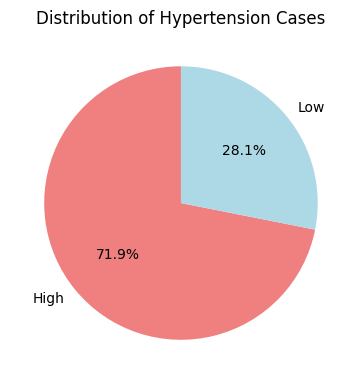

In [13]:
# 1. Hypertension Distribution Pie Chart
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
hypertension_counts = df['Hypertension'].value_counts()
plt.pie(hypertension_counts.values, labels=hypertension_counts.index, autopct='%1.1f%%',
         startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Distribution of Hypertension Cases')

/tmp/ipython-input-3244798391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Hypertension', y='Age', palette=['lightblue', 'lightcoral'])


Text(0, 0.5, 'Age')

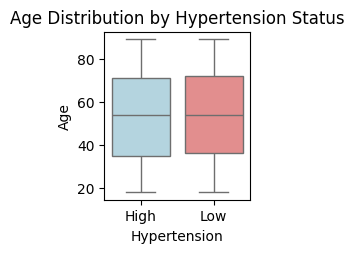

In [14]:
# 2. Age Distribution by Hypertension
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='Hypertension', y='Age', palette=['lightblue', 'lightcoral'])
plt.title('Age Distribution by Hypertension Status')
plt.ylabel('Age')

/tmp/ipython-input-1245617837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Hypertension', y='BMI', palette=['lightblue', 'lightcoral'])


Text(0, 0.5, 'BMI')

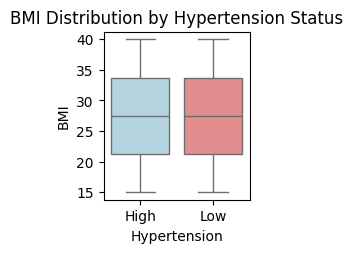

In [15]:
# 3. BMI Distribution
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Hypertension', y='BMI', palette=['lightblue', 'lightcoral'])
plt.title('BMI Distribution by Hypertension Status')
plt.ylabel('BMI')

Text(0, 0.5, 'Diastolic BP (mmHg)')

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


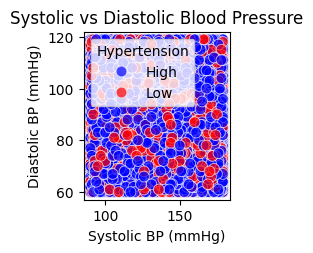

In [16]:
# 4. Blood Pressure Scatter Plot
plt.subplot(2, 3, 4)
sns.scatterplot(data=df, x='Systolic_BP', y='Diastolic_BP', hue='Hypertension',
               palette=['blue', 'red'], alpha=0.7, s=60)
plt.title('Systolic vs Diastolic Blood Pressure')
plt.xlabel('Systolic BP (mmHg)')
plt.ylabel('Diastolic BP (mmHg)')

Text(0.5, 0, 'Cholesterol Level')

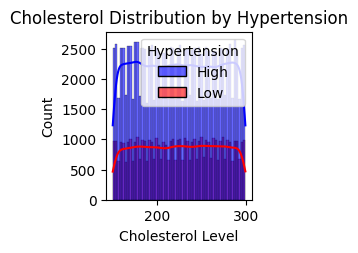

In [17]:
# 5. Cholesterol Distribution
plt.subplot(2, 3, 5)
sns.histplot(data=df, x='Cholesterol', hue='Hypertension', kde=True,
             alpha=0.6, palette=['blue', 'red'])
plt.title('Cholesterol Distribution by Hypertension')
plt.xlabel('Cholesterol Level')

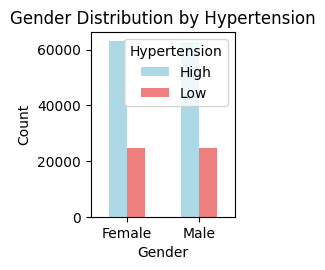

In [18]:
# 6. Gender Distribution by Hypertension
plt.subplot(2, 3, 6)
gender_hypertension = pd.crosstab(df['Gender'], df['Hypertension'])
gender_hypertension.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
plt.title('Gender Distribution by Hypertension')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Hypertension')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

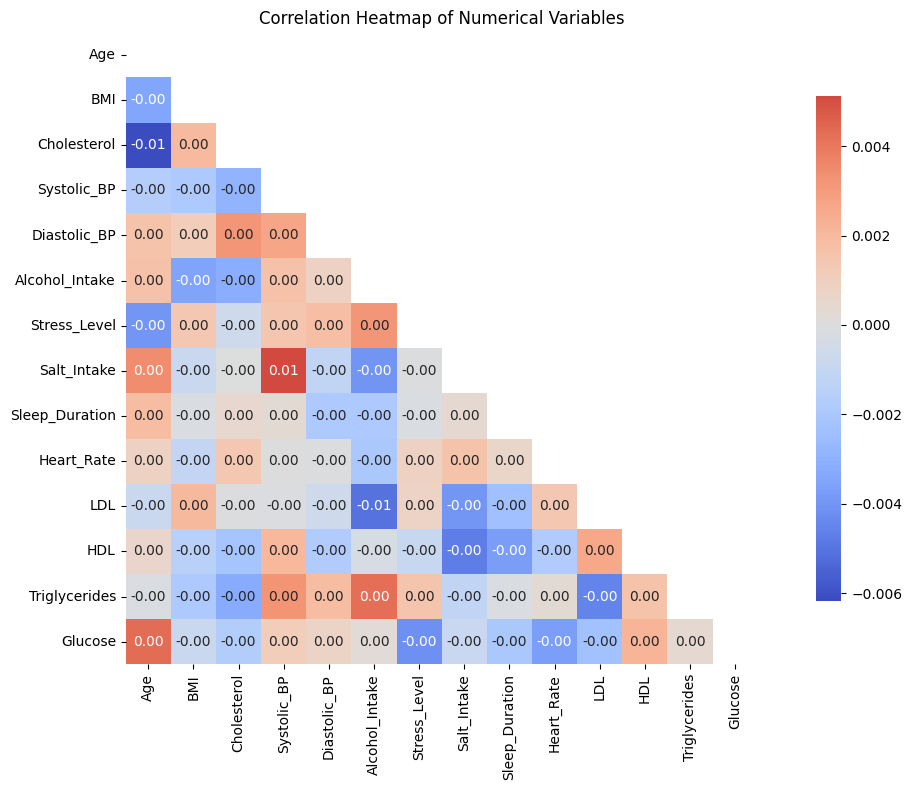

In [19]:
# 7. Correlation Heatmap (Numerical variables only)
plt.figure(figsize=(12, 8))
numerical_cols = ['Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
                 'Alcohol_Intake', 'Stress_Level', 'Salt_Intake', 'Sleep_Duration',
                 'Heart_Rate', 'LDL', 'HDL', 'Triglycerides', 'Glucose']

correlation_matrix = df[numerical_cols].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
           square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3215217852.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Hypertension', y='Stress_Level', palette=['lightblue', 'lightcoral'])
/tmp/ipython-input-3215217852.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Hypertension', y='Salt_Intake', palette=['lightblue', 'lightcoral'])


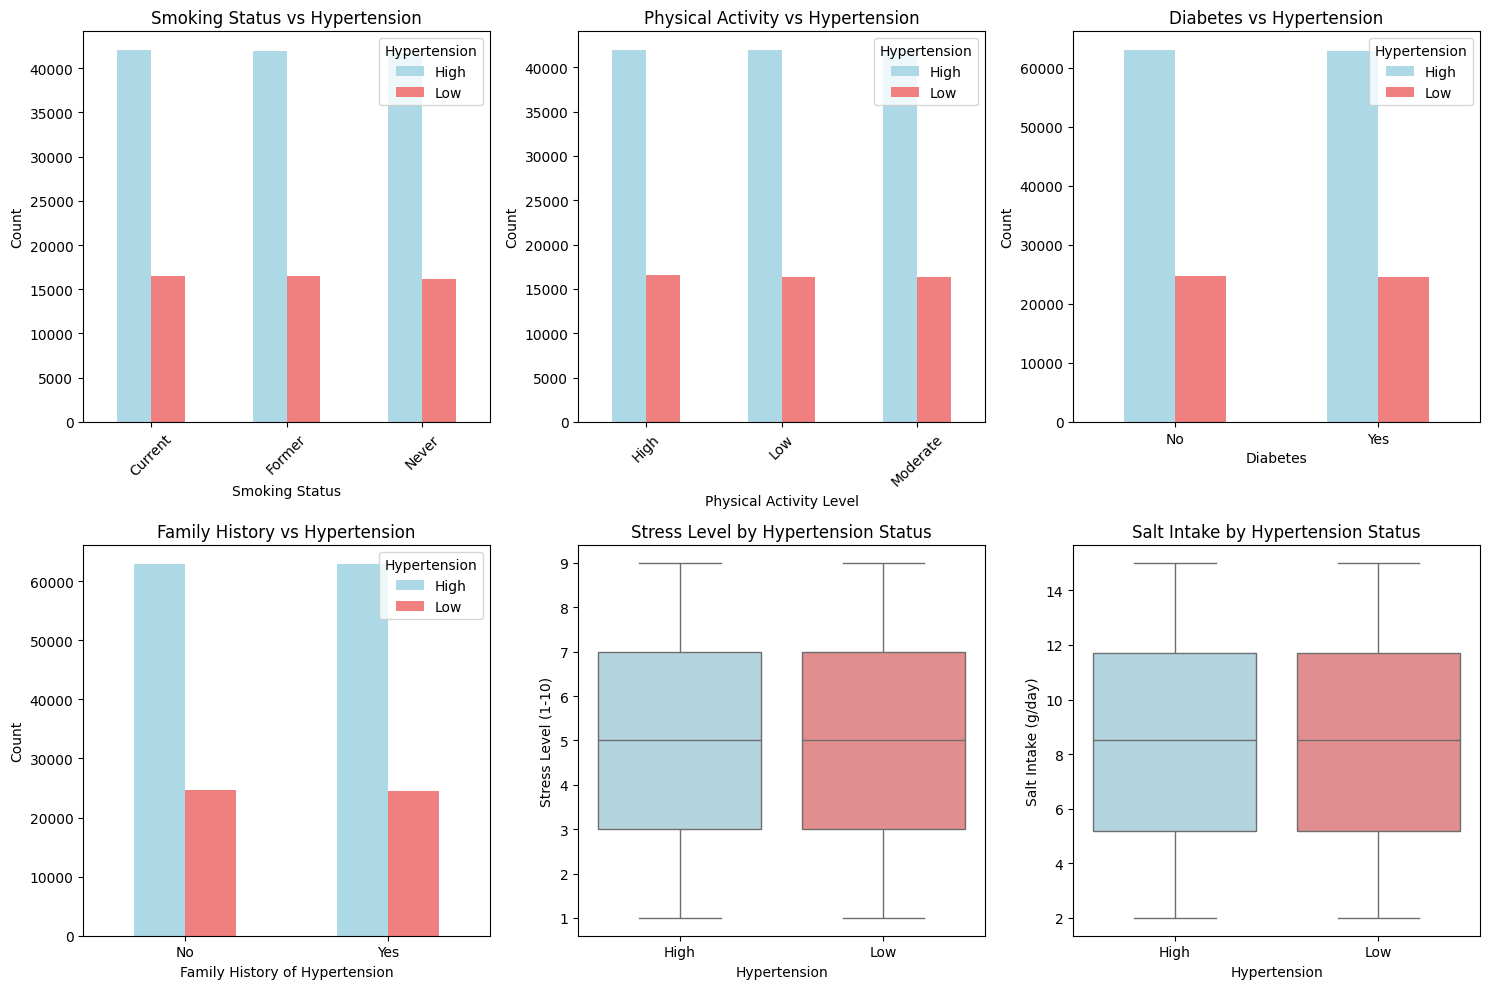

In [20]:
# 8. Lifestyle Factors vs Hypertension
plt.figure(figsize=(15, 10))

# Smoking Status
plt.subplot(2, 3, 1)
smoking_hypertension = pd.crosstab(df['Smoking_Status'], df['Hypertension'])
smoking_hypertension.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
plt.title('Smoking Status vs Hypertension')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Hypertension')
plt.xticks(rotation=45)

# Physical Activity
plt.subplot(2, 3, 2)
activity_hypertension = pd.crosstab(df['Physical_Activity_Level'], df['Hypertension'])
activity_hypertension.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
plt.title('Physical Activity vs Hypertension')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.legend(title='Hypertension')
plt.xticks(rotation=45)

# Diabetes
plt.subplot(2, 3, 3)
diabetes_hypertension = pd.crosstab(df['Diabetes'], df['Hypertension'])
diabetes_hypertension.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
plt.title('Diabetes vs Hypertension')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.legend(title='Hypertension')
plt.xticks(rotation=0)

# Family History
plt.subplot(2, 3, 4)
family_hypertension = pd.crosstab(df['Family_History'], df['Hypertension'])
family_hypertension.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
plt.title('Family History vs Hypertension')
plt.xlabel('Family History of Hypertension')
plt.ylabel('Count')
plt.legend(title='Hypertension')
plt.xticks(rotation=0)

# Stress Level
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='Hypertension', y='Stress_Level', palette=['lightblue', 'lightcoral'])
plt.title('Stress Level by Hypertension Status')
plt.ylabel('Stress Level (1-10)')

# Salt Intake
plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='Hypertension', y='Salt_Intake', palette=['lightblue', 'lightcoral'])
plt.title('Salt Intake by Hypertension Status')
plt.ylabel('Salt Intake (g/day)')

plt.tight_layout()
plt.show()

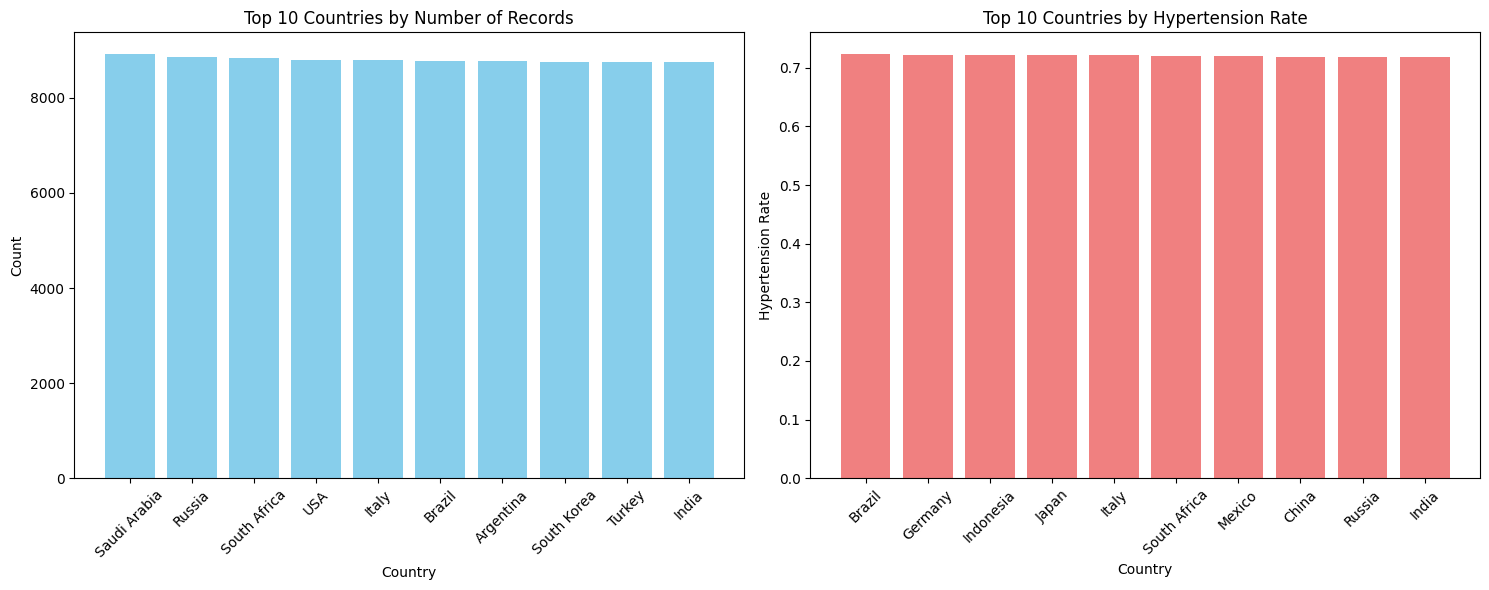

In [21]:
# 9. Country-wise Analysis (Top 10 countries)
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
country_counts = df['Country'].value_counts().head(10)
plt.bar(country_counts.index, country_counts.values, color='skyblue')
plt.title('Top 10 Countries by Number of Records')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
# Hypertension rate by country (for countries with sufficient data)
country_hypertension = df.groupby('Country')['Hypertension'].value_counts(normalize=True).unstack()
country_hypertension = country_hypertension['High'].sort_values(ascending=False).head(10)
plt.bar(country_hypertension.index, country_hypertension.values, color='lightcoral')
plt.title('Top 10 Countries by Hypertension Rate')
plt.xlabel('Country')
plt.ylabel('Hypertension Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipython-input-407899122.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Hypertension', y='Glucose', ax=axes[0,0], palette=['lightblue', 'lightcoral'])
/tmp/ipython-input-407899122.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Hypertension', y='LDL', ax=axes[0,1], palette=['lightblue', 'lightcoral'])
/tmp/ipython-input-407899122.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Hypertension', y='HDL', ax=axes[0,2], palette=['lightblue', 'lightcoral'])
/tmp/ipython-input-407899122.py:17: Fu

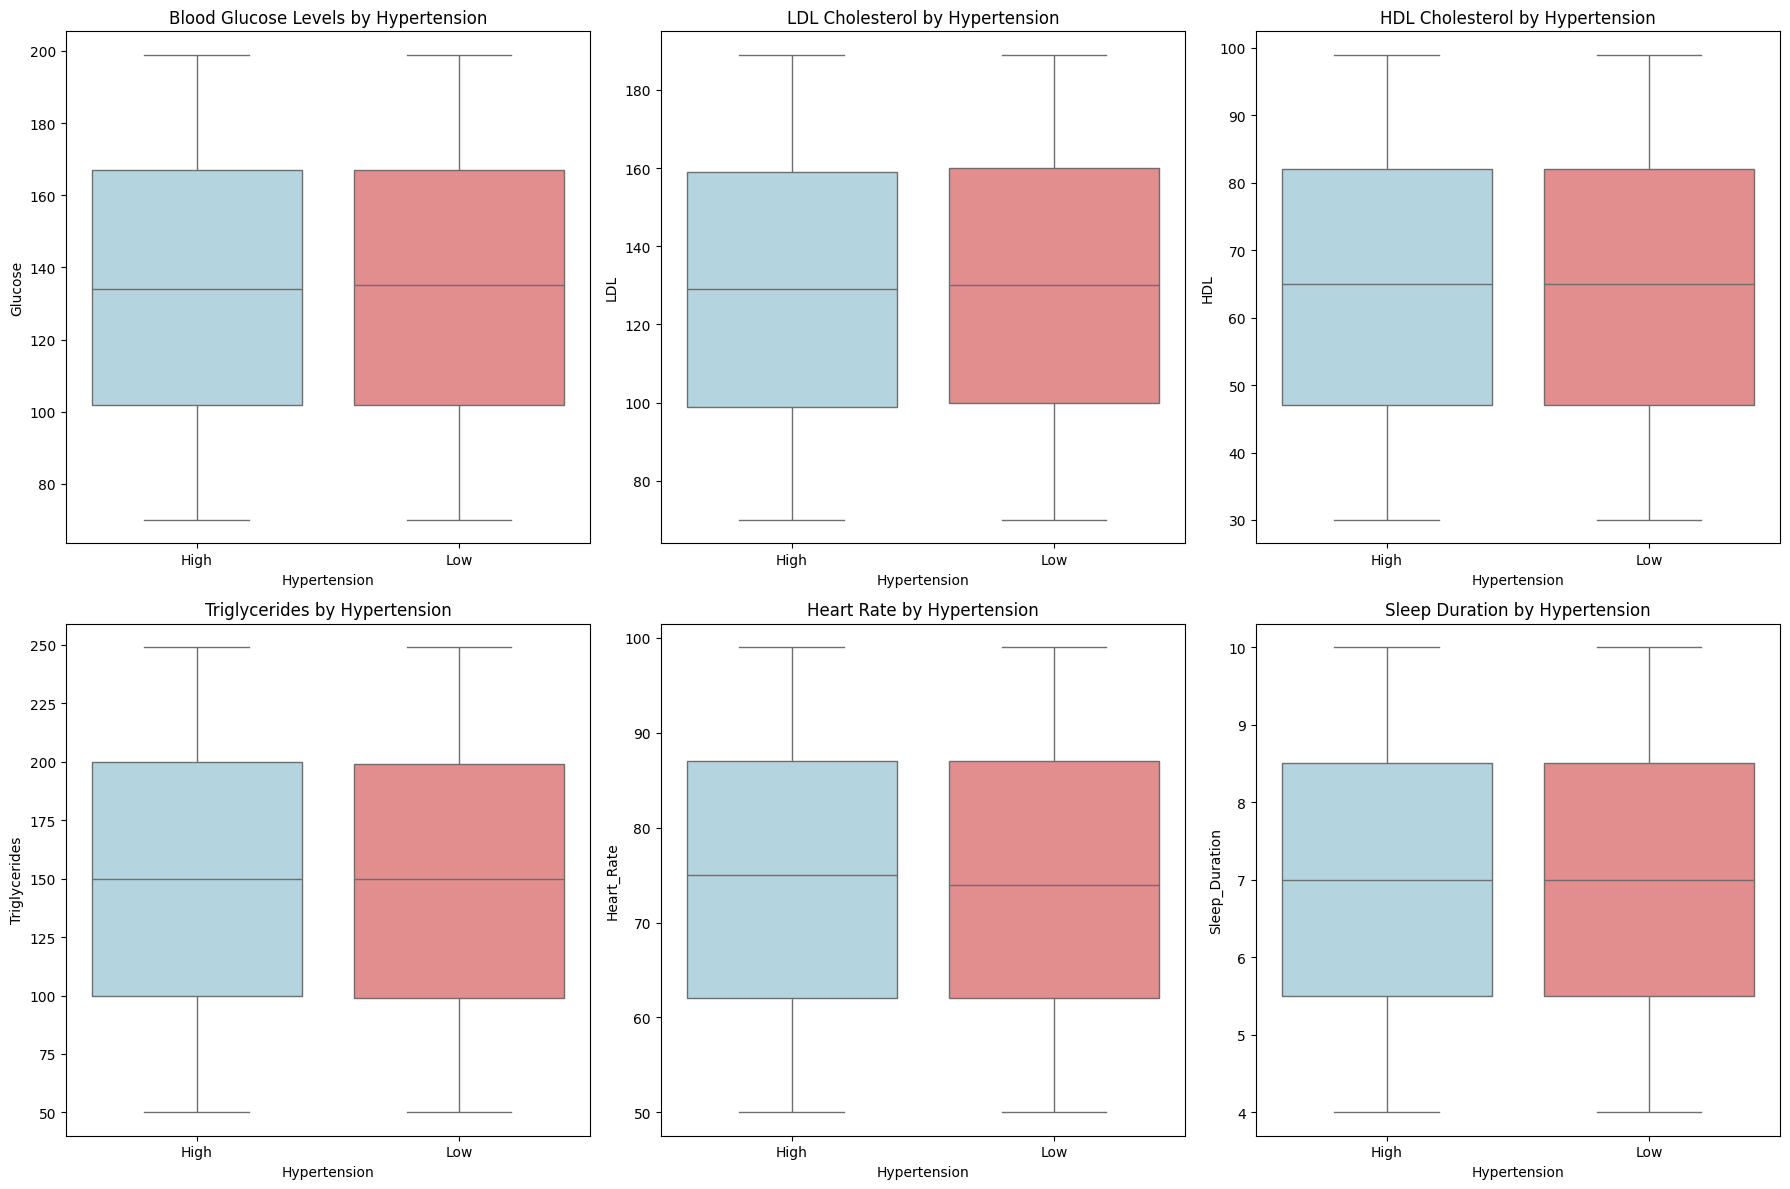


STATISTICAL SUMMARY

T-Test Results (High vs Low Hypertension Groups):
--------------------------------------------------
Age             | t-stat:  -1.391 | p-value:   0.1643 | Not Significant
BMI             | t-stat:  -0.424 | p-value:   0.6712 | Not Significant
Systolic_BP     | t-stat:  -1.082 | p-value:   0.2795 | Not Significant
Diastolic_BP    | t-stat:   0.871 | p-value:   0.3840 | Not Significant
Cholesterol     | t-stat:  -1.685 | p-value:   0.0919 | Not Significant
Stress_Level    | t-stat:  -0.196 | p-value:   0.8443 | Not Significant

Risk Factor Prevalence in Hypertension Groups:
--------------------------------------------------

Smoking_Status:
Hypertension     High    Low
Smoking_Status              
Current         71.81  28.19
Former          71.77  28.23
Never           72.08  27.92

Diabetes:
Hypertension   High    Low
Diabetes                  
No            71.81  28.19
Yes           71.96  28.04

Family_History:
Hypertension     High    Low
Family_History     

In [22]:
# 10. Detailed Analysis of Key Health Metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Glucose vs Hypertension
sns.boxplot(data=df, x='Hypertension', y='Glucose', ax=axes[0,0], palette=['lightblue', 'lightcoral'])
axes[0,0].set_title('Blood Glucose Levels by Hypertension')

# LDL Cholesterol
sns.boxplot(data=df, x='Hypertension', y='LDL', ax=axes[0,1], palette=['lightblue', 'lightcoral'])
axes[0,1].set_title('LDL Cholesterol by Hypertension')

# HDL Cholesterol
sns.boxplot(data=df, x='Hypertension', y='HDL', ax=axes[0,2], palette=['lightblue', 'lightcoral'])
axes[0,2].set_title('HDL Cholesterol by Hypertension')

# Triglycerides
sns.boxplot(data=df, x='Hypertension', y='Triglycerides', ax=axes[1,0], palette=['lightblue', 'lightcoral'])
axes[1,0].set_title('Triglycerides by Hypertension')

# Heart Rate
sns.boxplot(data=df, x='Hypertension', y='Heart_Rate', ax=axes[1,1], palette=['lightblue', 'lightcoral'])
axes[1,1].set_title('Heart Rate by Hypertension')

# Sleep Duration
sns.boxplot(data=df, x='Hypertension', y='Sleep_Duration', ax=axes[1,2], palette=['lightblue', 'lightcoral'])
axes[1,2].set_title('Sleep Duration by Hypertension')

plt.tight_layout()
plt.show()

# Statistical Summary
print("\n" + "="*60)
print("STATISTICAL SUMMARY")
print("="*60)

# T-tests for key variables
print("\nT-Test Results (High vs Low Hypertension Groups):")
print("-" * 50)

key_variables = ['Age', 'BMI', 'Systolic_BP', 'Diastolic_BP', 'Cholesterol', 'Stress_Level']

for var in key_variables:
    high_group = df[df['Hypertension'] == 'High'][var]
    low_group = df[df['Hypertension'] == 'Low'][var]

    t_stat, p_value = stats.ttest_ind(high_group, low_group, nan_policy='omit')

    print(f"{var:15} | t-stat: {t_stat:7.3f} | p-value: {p_value:8.4f} | {'Significant' if p_value < 0.05 else 'Not Significant'}")

# Risk Factor Analysis
print("\nRisk Factor Prevalence in Hypertension Groups:")
print("-" * 50)

risk_factors = ['Smoking_Status', 'Diabetes', 'Family_History']

for factor in risk_factors:
    cross_tab = pd.crosstab(df[factor], df['Hypertension'], normalize='index') * 100
    print(f"\n{factor}:")
    print(cross_tab.round(2))

print("\n" + "="*60)
print("KEY INSIGHTS:")
print("="*60)
print("1. Check the correlation heatmap for relationships between variables")
print("2. Look for significant differences in means between hypertension groups")
print("3. Analyze lifestyle factors and their association with hypertension")
print("4. Consider demographic patterns across countries and genders")